# PYTHON PROGRAMMING


In [2]:
# 한글 찍기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [1]:
%pip install koreanize-matplotlib
from koreanize_matplotlib import koreanize
koreanize()

   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------- ----------------------------- 2.1/7.9 MB 13.1 MB/s eta 0:00:01
   --------------------- ------------------ 4.2/7.9 MB 10.1 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/7.9 MB 10.7 MB/s eta 0:00:01
   -------------------------------------- - 7.6/7.9 MB 9.0 MB/s eta 0:00:01
   ---------------------------------------- 7.9/7.9 MB 8.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## subwayfee.csv 파일을 통한 지하철 유무임별 이용현황 데이터 분석

- 자료출처 : t-money.co.kr 에서 자료를 제공함. encoding = 'cp949'

In [55]:
df = pd.read_csv('../data/subwayfee.csv',encoding = 'cp949')

## 실습 0. 유임승차, 유임하차, 무임승차, 무임하차 4가지 별로,  각각 가장 많은 역을 찾아보세요.

## 실습 1. 무임승차 대비 유임승차 비율이 가장 높은 역은 어디입니까?

In [56]:
df.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
0,2019-01,1호선,150,서울역,1516452,1400464,221180,211764
1,2019-01,1호선,151,시청,676932,676266,102388,101033
2,2019-01,1호선,152,종각,1240810,1177643,162410,152062
3,2019-01,1호선,153,종로3가,703110,674148,387062,362735
4,2019-01,1호선,154,종로5가,571824,583955,275447,263687


In [57]:
df.shape

(598, 8)

In [29]:
df['역ID'].nunique()

598

In [30]:
df['지하철역'].nunique()

509

In [58]:
df['지하철역'].value_counts()

지하철역
서울역          6
공덕           4
김포공항         4
홍대입구         4
동대문역사문화공원    3
            ..
상록수          1
반월           1
대야미          1
산본           1
정릉           1
Name: count, Length: 509, dtype: int64

In [62]:
df['비율']=df['유임승차']/df['무임승차']

In [65]:
df

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,비율
0,2019-01,1호선,150,서울역,1516452,1400464,221180,211764,6.856190
1,2019-01,1호선,151,시청,676932,676266,102388,101033,6.611439
2,2019-01,1호선,152,종각,1240810,1177643,162410,152062,7.639985
3,2019-01,1호선,153,종로3가,703110,674148,387062,362735,1.816531
4,2019-01,1호선,154,종로5가,571824,583955,275447,263687,2.075986
...,...,...,...,...,...,...,...,...,...
593,2019-01,우이신설선,4709,북한산보국문,131839,117790,40396,40629,3.263665
594,2019-01,우이신설선,4710,정릉,83527,73090,43457,41092,1.922061
595,2019-01,우이신설선,4711,성신여대입구(돈암),77040,89799,31555,29648,2.441451
596,2019-01,우이신설선,4712,보문,31502,32724,15900,16109,1.981258


In [66]:
df.loc[df['무임승차'] != 0, ].sort_values('비율',ascending=False )

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,비율
72,2019-01,3호선,321,충무로,55,0,2,0,27.500000
48,2019-01,2호선,239,홍대입구,2351935,2507561,114832,111488,20.481530
560,2019-01,공항철도 1호선,4203,홍대입구,336328,335507,17545,17112,19.169450
566,2019-01,공항철도 1호선,4210,청라국제도시,174320,164483,9921,9676,17.570809
120,2019-01,경부선,1001,서울역,178223,29980,10325,1612,17.261308
...,...,...,...,...,...,...,...,...,...
301,2019-01,장항선,1407,온양온천,84623,85690,73363,73626,1.153483
591,2019-01,우이신설선,4707,삼양사거리,37572,38401,35436,36998,1.060278
295,2019-01,중앙선,1219,용문,36259,36316,34572,34257,1.048797
7,2019-01,1호선,157,제기동,293540,288217,374571,400607,0.783670


In [67]:
df.loc[df['지하철역'] == '충무로' , ]

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,비율
72,2019-01,3호선,321,충무로,55,0,2,0,27.500000
108,2019-01,4호선,423,충무로,778649,804659,129893,131057,5.994542


## 실습 2. 전체승차인원(유임+무임)이 만명이상인 역 중, 유임승차 비율이 가장 높은 역은 어디입니까?

In [68]:
df['전체승차'] = df['유임승차'] + df['무임승차']
df.loc[df['전체승차'] >= 10000,].sort_values('비율', ascending = False)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,비율,전체승차
48,2019-01,2호선,239,홍대입구,2351935,2507561,114832,111488,20.481530,2466767
560,2019-01,공항철도 1호선,4203,홍대입구,336328,335507,17545,17112,19.169450,353873
566,2019-01,공항철도 1호선,4210,청라국제도시,174320,164483,9921,9676,17.570809,184241
120,2019-01,경부선,1001,서울역,178223,29980,10325,1612,17.261308,188548
557,2019-01,9호선,4125,신논현,965930,995451,57013,54557,16.942276,1022943
...,...,...,...,...,...,...,...,...,...,...
301,2019-01,장항선,1407,온양온천,84623,85690,73363,73626,1.153483,157986
591,2019-01,우이신설선,4707,삼양사거리,37572,38401,35436,36998,1.060278,73008
295,2019-01,중앙선,1219,용문,36259,36316,34572,34257,1.048797,70831
7,2019-01,1호선,157,제기동,293540,288217,374571,400607,0.783670,668111


## 실습 3. 모든 역의 유임승차, 유임하차, 무임 승차, 무임하차, 총 4개를, 파이차트로 나타내세요.

In [94]:
import matplotlib.pyplot as plt
for index in range (0,579):
# 역을 바꾸려면 숫자만 바꾸면 됨
    data = df.loc[1,'유임승차':'무임하차']
    data

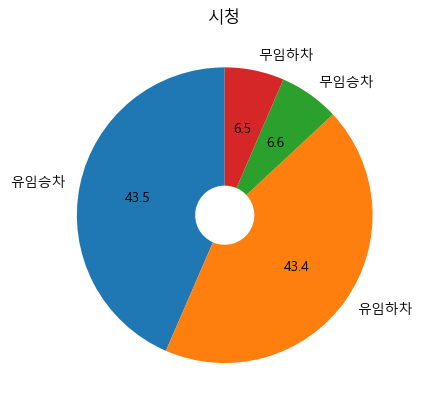

In [95]:
plt.pie(data,labels=data.index,startangle=90,wedgeprops={'width':0.8},autopct='%.1f')
# 역을 바꾸려면 숫자만 바꾸면 됨
plt.title(df.loc[1,'지하철역'])
plt.show()

In [81]:
df['지하철역'][0]

'서울역'

In [82]:
df.loc[0,'지하철역']

'서울역'